In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('dataset/asset-v1_Kodlasam+DS_02+2023_07_05+type@asset+block@IMDB_Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
# Veri setinin genel yapısını inceliyorum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Toplam Gözlem Sayısı: 50,000 Sütunlar: 2 (review ve sentiment) review: Metin verisi (object) sentiment: Duygu durumu etiketi (positive veya negative, object) Eksik Veri: Her iki sütunda da eksik değer bulunmamakta (50,000 satırın tamamı dolu)

In [3]:
# Veri setindeki sütun isimleri ve örnek satırları görüntülüyorum.
df.columns, df.head(10)

(Index(['review', 'sentiment'], dtype='object'),
                                               review sentiment
 0  One of the other reviewers has mentioned that ...  positive
 1  A wonderful little production. <br /><br />The...  positive
 2  I thought this was a wonderful way to spend ti...  positive
 3  Basically there's a family where a little boy ...  negative
 4  Petter Mattei's "Love in the Time of Money" is...  positive
 5  Probably my all-time favorite movie, a story o...  positive
 6  I sure would like to see a resurrection of a u...  positive
 7  This show was an amazing, fresh & innovative i...  negative
 8  Encouraged by the positive comments about this...  negative
 9  If you like original gut wrenching laughter yo...  positive)

İlk 10 satırda, her bir yorumun duygusal durumu belirlenmiş ve genellikle uzun metinler içeriyor. Metin verisi, HTML etiketleri gibi gereksiz öğeler içeriyor olabilir, bu yüzden ön işleme sırasında bu gibi unsurları temizlememiz gerekecek.

şimdi ön işlemeye geçiyorum. Lemmatization yaparak kelimelerin köklerine inme metodu uygulamaya karar verdiğim için wordnet yüklüyorum sistemime

In [4]:
import re # Metindeki belirli karakterleri veya desenleri değiştirebilmek için kullanıyorum.
from bs4 import BeautifulSoup  # HTML etiketlerini kaldırmak için kullanıyorum.
import nltk # Doğal dil işleme kütüphanesi
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

# 1. BÜtün harfleri küçük harf yapıyorum.
df['cleaned_review'] = df['review'].str.lower()

# 2. Html etiketlerini kaldırıyorum.
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

# 3. Noktalama ve özel işaretleri kaldırıyorum.
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# 4. Lemmatization: Kelime köklerine indirip daha sonra join ile tekrar birleştiriyorum.
lemmatizer = WordNetLemmatizer()
df['cleaned_review'] = df['cleaned_review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Temizlenmiş veriden ilk 10 satırı görüntülüyorum.
df[['review', 'cleaned_review']].head(10)

[nltk_data] Downloading package wordnet to C:\Users\Alper
[nltk_data]     Ilgın\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\Alper Ilgın\AppData\Local\Temp\ipykernel_9352\377218149.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df['cleaned_review'] = df['cleaned_review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one of the other reviewer ha mentioned that af...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this wa a wonderful way to spend tim...
3,Basically there's a family where a little boy ...,basically there a family where a little boy ja...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the time of money is a ...
5,"Probably my all-time favorite movie, a story o...",probably my alltime favorite movie a story of ...
6,I sure would like to see a resurrection of a u...,i sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i...",this show wa an amazing fresh innovative idea ...
8,Encouraged by the positive comments about this...,encouraged by the positive comment about this ...
9,If you like original gut wrenching laughter yo...,if you like original gut wrenching laughter yo...


Yukarıdaki işlemlerde veri daha tutarlı ve temiz hala getirildi.

In [75]:
# şimdi veri görselleştirme yaparak sınıf dağılımlarına bakacağım.

bar grafiği ve pasta grafiği yöntemlerini seçiyorum görselleştirme kısmında.

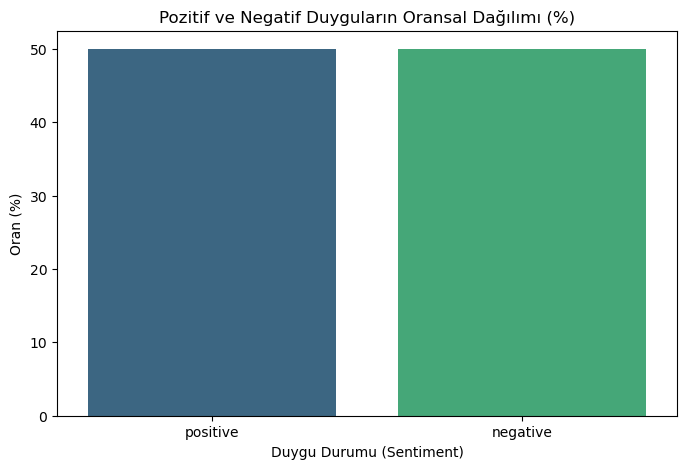

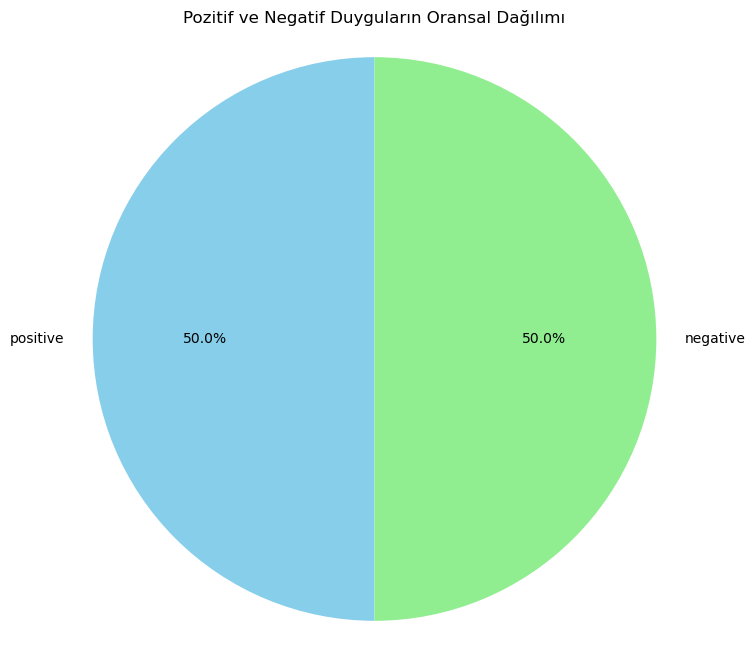

In [6]:
class_counts = df['sentiment'].value_counts(normalize=True) * 100

# Bar grafiği gösterimi
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Pozitif ve Negatif Duyguların Oransal Dağılımı (%)')
plt.xlabel('Duygu Durumu (Sentiment)')
plt.ylabel('Oran (%)')
plt.show()

# Pasta grafiği
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Pozitif ve Negatif Duyguların Oransal Dağılımı')
plt.axis('equal')
plt.show()

Her iki sınıfın da neredeyse eşit sayıda olduğunu görüyoruz.

Bu görselde sınıflar arası dengenin gayet iyi durumda olduğu dengesiz bir veriyle çalışılmayacağı anlaşılıyor.

Altta yazacağım kodda film inceleme metinlerinde sıkça geçen kelimeleri analiz ederek önemsiz kelimeleri çıkaracağım. ardından kelime frekanslarını hesaplayarak en sık geçen kelimeleri bar grafiği ve kelime bulutu olarak görselleştireceğim..

[nltk_data] Downloading package stopwords to C:\Users\Alper
[nltk_data]     Ilgın\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


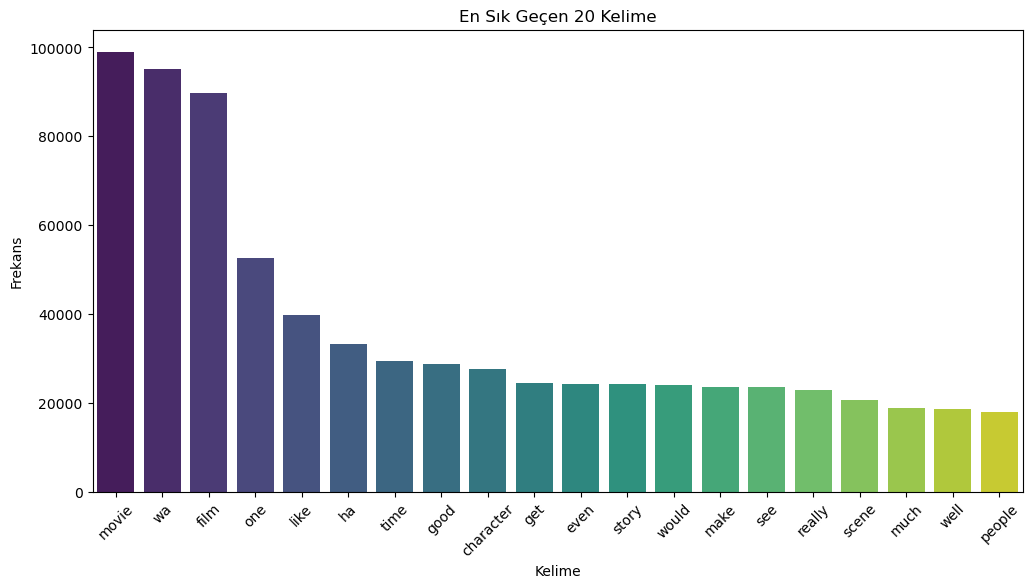

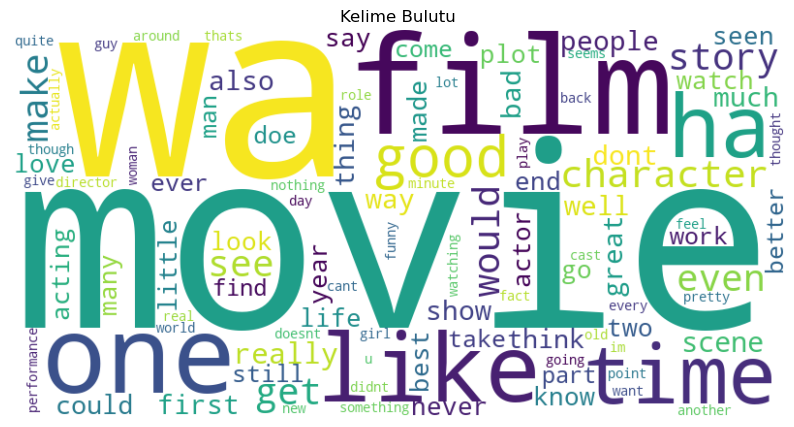

In [7]:
from nltk.corpus import stopwords #Stop words (önemsiz kelimeler) listesini almak için
from collections import Counter   #Kelimelerin sayısını hesaplamak için
from wordcloud import WordCloud   #Kelime bulutu (WordCloud) oluşturmak için
import nltk
nltk.download('stopwords')        #İngilizce için önemsiz kelimeleri içeren veriyi indirir.

# 1. Stop Words'leri Kaldırma  
stop_words = set(stopwords.words('english'))

# Metin verisini tokenize etme ve stop words'leri çıkarma
df['tokenized_review'] = df['cleaned_review'].apply(lambda x: [word for word in x.split() if word not in stop_words])

# 2. Tüm kelimeleri tek bir listeye toplama
all_words = [word for tokens in df['tokenized_review'] for word in tokens]

# 3. Kelime frekanslarını hesaplama
word_freq = Counter(all_words)

# 4. En sık geçen 20 kelimeyi bulma
most_common_words = word_freq.most_common(20)

# 5. Bar Grafiği ile Görselleştirme
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title('En Sık Geçen 20 Kelime')
plt.xlabel('Kelime')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()

# 6. Kelime Bulutu (WordCloud) ile Görselleştirme
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kelime Bulutu')
plt.show()

In [8]:
#şimdi veriyi eğitelim ve duygu analizini gerçekleştirelim.

Öncelikle veri setimizi eğitim ve test olarak 2' ye ayırıyoruz.

In [9]:
from sklearn.model_selection import train_test_split

# 1. Veri setini eğitim ve test olarak ayırma (%80 eğitim, %20 test)
X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

yukarıda X'i yorum metinleri y' yi duygusal etiket olarak ayırıyoruz.

Uygun bir makine öğrenmesi modeli seçimi yapmamız lazım. Bunun için Naive Bayes modelini tercih ediyorum. Sebebi ise bu model metin sınıflandırma ve duygusal analizler için iyi performans göstereceğini düşünmem.

BUnlardan önce ise makine öğrenmesi sayısal veriler ile çalıştığı için metin verilerini sayısal formata dönüştürmem gerekiyor. 

TfidfVectorizer kullanarak kelimeleri temsil eden sayısal özellikleri elde edeceğim.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000) #hesaplama süresini azaltmak için en fazla 5000 kelime dedim
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

TF-IDF yöntemi bir belgede kelimenin ne sıklıkla geçitiğini ve bu kelimenin belge içindeki önemini hesaba katar.

Altta modelimi eğitiyorum. YUkarıda bahsettiğim gibi Naive Bayes modelini kullanıyorum.

In [11]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [12]:
# Şimdi modelin başarısını ölçelim. Bunun için test verisini kullanıyoruz.

In [13]:
from sklearn.metrics import classification_report, accuracy_score

# 4. Modeli test verisi üzerinde değerlendirme
y_pred = model.predict(X_test_tfidf)

# 5. Sonuçları değerlendirme: Accuracy ve Classification Report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Sonuçları yazdırma
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_rep)

Model Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Modelimiz test verisini %85'ini doğru şekilde sınıflandırabilmiş.

Bu doğruluk oranı modelin film yorumlarını pozitif yada negativ doğru bir şekilde ayrırabildiğini gösteriyor.

Yine de tek bir modele bağlı kalarak ilerlemeyeceğiz. Farklı model ve hiperparametreler ile denemeler yapacağız ve en iyi modeli seçeceğiz.

Lojistik Regresyon, Destek Vektör Makineleri (SVM) modelleri gibi yaygın kullanan modelleri de deneyeceğiz. 

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Veri setini bağımsız değişken (X) ve hedef değişken (y) olarak ayırmalım
X = df['cleaned_review']
y = df['sentiment']

# TF-IDF Dönüştürücü ile metin verisini sayısal hale getirelim
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Eğitim ve değerlendirme için veriyi ayıroyorum. (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

en uygun hiperparametreleri bulmak için GridSearchCV kullanıcağım.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Lojistik regresyon modeli ve hiperparametre ayarı yapıyorum
logreg = LogisticRegression(max_iter=1000)
logreg_params = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

# SVM modeli ve hiperparametre ayarı yapıyorum
svc = SVC()
svc_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# GridSearchCV kullanarak en iyi hiperparametreleri buluyorum
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid = GridSearchCV(svc, svc_params, cv=5, scoring='accuracy', n_jobs=-1)

# Lojistik regresyon modelini eğitiyorum
logreg_grid.fit(X_train, y_train)

# SVM modeli eğitiyorum
svc_grid.fit(X_train, y_train)

# En iyi hiperparametreleri ve modelleri görüntüleme
print("Logistic Regression Best Parameters:", logreg_grid.best_params_)
print("SVM Best Parameters:", svc_grid.best_params_)

Logistic Regression Best Parameters: {'C': 1, 'solver': 'liblinear'}
SVM Best Parameters: {'C': 10, 'kernel': 'rbf'}


BU sonuçlara göre logistik regresyon modeli daha basit SVM ise daha karmaşık bir model oluşturmaktadır.

Şİmdi ise Cross-Validation kullanarak model performanslarını değerlendireceğim.

In [17]:
from sklearn.model_selection import cross_val_score

# En iyi modelleri seçme
logreg_best = logreg_grid.best_estimator_
svc_best = svc_grid.best_estimator_

# Cross-validation ile performans değerlendirme (5 katmanlı CV)
logreg_cv_score = cross_val_score(logreg_best, X_tfidf, y, cv=5, scoring='accuracy').mean()
svc_cv_score = cross_val_score(svc_best, X_tfidf, y, cv=5, scoring='accuracy').mean()

print(f"Logistic Regression CV Accuracy: {logreg_cv_score:.2f}")
print(f"SVM CV Accuracy: {svc_cv_score:.2f}")

Logistic Regression CV Accuracy: 0.89
SVM CV Accuracy: 0.89


Yukarıda da gözüktüğü üzere ikisinde de %89 luk bir sonuç var. Yukarıda da naive-bayes modelinde %85 lik bir sonuç vardı. 

Şimdi en iyi model seçtirelim.

In [18]:
best_model_name = 'Logistic Regression' if logreg_cv_score > svc_cv_score else 'SVM'
best_model_score = max(logreg_cv_score, svc_cv_score)

print(f"En İyi Model: {best_model_name} (Accuracy: {best_model_score:.2f})")

En İyi Model: SVM (Accuracy: 0.89)


Cross-validation doğruluk oranlarının her ikisinin de aynı.Önceki adımda "SVM en iyi model" sonucunu verirken, SVM modelinin genel olarak daha stabil ve daha iyi performans gösterme eğiliminde olmasından dolayı bu seçim yapılmış olabilir.

Yapacağımız işlemlere göre modelin alt yapısına göre bir seçim yapacağız ve ona göre ilerleyeceğiz.

Bundan sonraki süreçte en önemli özellikleri görselleştireceğiz. 

SVM modelindeki mantık verileri daha iyi ayırabilen bir hiper düzlem oluşturmaktır. Dolayısıyla bireysel özelliklerin önemini çıkartmaz.

Bu tür özellik önemi gibi analizler yapmak için logistic regresyon gibi modeller tercih edilebilir. YUkarıda performansı da %89 luk gibi bir yüksek oran çıktığı için onu tercih ederek devam ediyorum.

In [19]:
# Veri setini tekrar ayırıyorum.
X = df['cleaned_review']
y = df['sentiment']

In [20]:
# metin verisini sayısal hale getiriyorum.
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

özellik önemini bulacağım

In [21]:
# Özellik önemini bulmak için modeli oluşturuyırum.
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_tfidf, y)

LogisticRegression(max_iter=1000)

In [22]:
# Özellik ağırlıklarını elde ediyorum
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_importance = logreg.coef_[0]

In [24]:
# En pozitif ve en negatif etkiye sahip 10 özelliği buluyorum.
top_n = 10
top_positive_indices = np.argsort(feature_importance)[-top_n:]
top_negative_indices = np.argsort(feature_importance)[:top_n]

In [25]:
# En önemli pozitif ve negatif kelimeleri aluyorum.
top_positive_features = [(feature_names[i], feature_importance[i]) for i in top_positive_indices]
top_negative_features = [(feature_names[i], feature_importance[i]) for i in top_negative_indices]

# Pozitif ve negatif özellikleri birleştiriyorum.
top_features = top_positive_features + top_negative_features
features, weights = zip(*top_features)

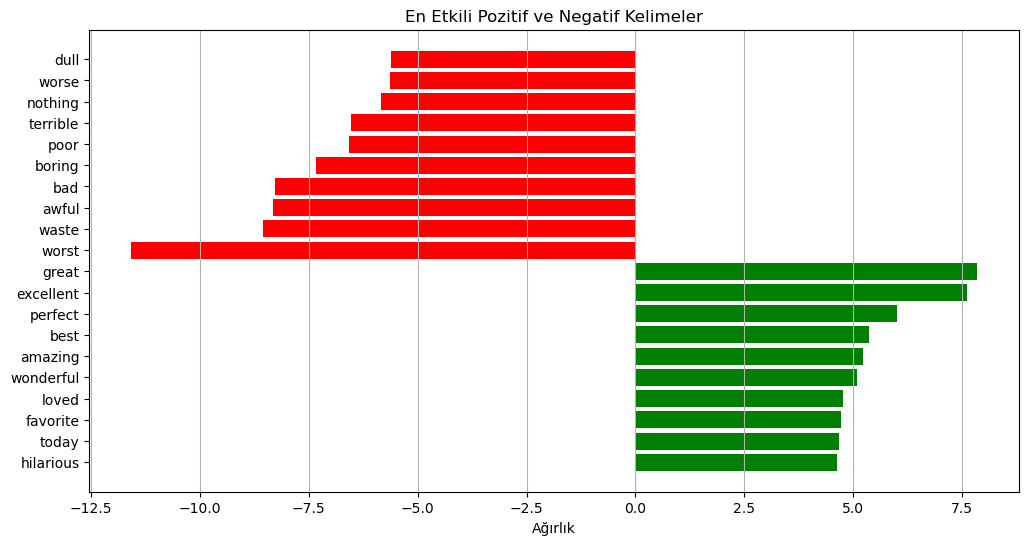

In [26]:
# En önemli özellikleri bar grafiği ile görselleştiriyoum.
plt.figure(figsize=(12, 6))
plt.barh(features, weights, color=['green' if w > 0 else 'red' for w in weights])
plt.xlabel('Ağırlık')
plt.title('En Etkili Pozitif ve Negatif Kelimeler')
plt.grid(axis='x')
plt.show()

Yukarıda kırmızı renkliler negativ yeşiller pozitif etkiye sahip kelimeler.

worst, waste, awful, bad, boring gibi kelimeler negatif sınıflandırmada en etkili olan kelimeler

BU kelimeler modelin negatif bir duygu hissetmesinde belirgin bir etkiye sahip.

En büyük negatiflik worst kelimesine aittir. Bu kelime, bir inceleme metninde yer aldığında model için güçlü bir negatif gösterge anlamına gelir.

great, excellent, perfect, best, amazing gibi kelimeler pozitif sınıflandırmada en etkili

Bu kelimeler modelin pozitif sınıflandırma yapma eğilimini artırır.

En büyük pozitif ağırlık great kelimesine aittir

Bu tür grafikler, modelin sınıflandırma sırasında neyi temel aldığını anlamak açısından oldukça faydalıdır ve model performansını daha iyi anlamak ve iyileştirmek için kullanılabilir

In [31]:
#şimdi konu modellemesi kısmına geçiyoruz.

konu modellemesi özellikle metin verilerindeki gizli temaları (konuları) ortaya çıkarmak için kullanılır ve LDA (Latent Dirichlet Allocation) veya NMF (Non-negative Matrix Factorization) gibi yöntemlerle yapılır

NMF yöntemiyle belirli sayıda konu oluşturacağız. Başlangıç için 5 konuyu modelleyeceğiz:

In [33]:
from sklearn.decomposition import NMF

# 5 farklı konu belirleyerek NMF modeli oluşturuyorum
nmf_model = NMF(n_components=5, random_state=42)
W = nmf_model.fit_transform(X_tfidf)  # belge ve konular arasındaki bağlantı
H = nmf_model.components_  # konular ve kelimeler arasındaki bağlantı

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


altta en uygun konu sayısnı belirleyeceğiz.

burada farklı konu sayıları deneyerek en uygun konu sayısnı bulacağız bunuda konu sayısnı arttırarak denyeceğiz.

In [34]:
# 5, 10 ve 15 konulu modelleri deniyorum.
for n_topics in [5, 10, 15]:
    nmf_model = NMF(n_components=n_topics, random_state=42)
    W = nmf_model.fit_transform(X_tfidf)
    H = nmf_model.components_
    print(f"Konu Sayısı: {n_topics}")
    
    # Her konu için en önemli 10 kelimeyi yazdırıyorum.
    for idx, topic in enumerate(H):
        print(f"Konu #{idx + 1}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")
    print("\n")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Konu Sayısı: 5
Konu #1: the, of, and, in, to, is, with, are, by, from
Konu #2: movie, this, you, it, is, to, if, bad, that, and
Konu #3: he, her, his, and, to, she, is, in, him, who
Konu #4: wa, the, it, to, and, that, were, had, my, show
Konu #5: film, it, and, is, this, of, to, that, you, in




C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Konu Sayısı: 10
Konu #1: the, of, in, is, to, by, from, scene, on, with
Konu #2: movie, this, bad, ever, seen, worst, of, have, to, one
Konu #3: he, his, him, to, in, is, who, man, with, ha
Konu #4: wa, it, the, and, were, had, but, my, me, that
Konu #5: film, this, of, to, in, that, have, be, seen, for
Konu #6: her, she, to, is, in, woman, and, girl, who, shes
Konu #7: and, of, with, in, their, are, great, by, an, love
Konu #8: to, that, they, show, be, have, of, or, we, people
Konu #9: is, it, but, not, good, very, the, that, are, there
Konu #10: you, if, it, your, will, and, the, watch, dont, see




C:\ProgramData\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Konu Sayısı: 15
Konu #1: the, in, from, scene, on, at, to, first, end, by
Konu #2: movie, this, in, my, seen, great, ever, the, have, one
Konu #3: he, his, him, in, is, who, man, with, ha, to
Konu #4: wa, were, had, the, that, did, very, good, not, thought
Konu #5: film, this, in, the, seen, have, made, for, director, ever
Konu #6: her, she, in, woman, girl, shes, who, and, with, is
Konu #7: and, with, great, love, to, story, are, very, their, by
Konu #8: it, but, so, just, me, really, my, on, like, because
Konu #9: is, not, that, very, are, but, good, the, there, it
Konu #10: you, if, your, will, see, watch, can, dont, want, then
Konu #11: bad, and, acting, worst, this, of, even, just, no, plot
Konu #12: show, episode, series, the, this, season, tv, on, my, funny
Konu #13: of, in, one, an, by, with, most, which, for, some
Konu #14: they, that, are, we, people, and, their, them, have, in
Konu #15: to, be, have, that, would, want, see, try, an, going




yukarıda da görüldüğü üzere konus sayısı 15 olunca kelimeler konulara göre daha iyi dağılmış duruyor. örneğin of kelimesi konu sayısı 10 iken neredeyse her konuda var iken konu sayısı 15 olunca sadece 2 konuda geçiyor.

şimdi her konuyu en iyi ifade eden en önemli kelimeleri listeleyerek bir görselleştirme yapacağım.Topic Modeling yaparak yorumşayacağım.

Konu #1:
the, in, from, scene, on, at, to, first, end, by
Konu #2:
movie, this, in, my, seen, great, ever, the, have, one
Konu #3:
he, his, him, in, is, who, man, with, ha, to
Konu #4:
wa, were, had, the, that, did, very, good, not, thought
Konu #5:
film, this, in, the, seen, have, made, for, director, ever
Konu #6:
her, she, in, woman, girl, shes, who, and, with, is
Konu #7:
and, with, great, love, to, story, are, very, their, by
Konu #8:
it, but, so, just, me, really, my, on, like, because
Konu #9:
is, not, that, very, are, but, good, the, there, it
Konu #10:
you, if, your, will, see, watch, can, dont, want, then
Konu #11:
bad, and, acting, worst, this, of, even, just, no, plot
Konu #12:
show, episode, series, the, this, season, tv, on, my, funny
Konu #13:
of, in, one, an, by, with, most, which, for, some
Konu #14:
they, that, are, we, people, and, their, them, have, in
Konu #15:
to, be, have, that, would, want, see, try, an, going


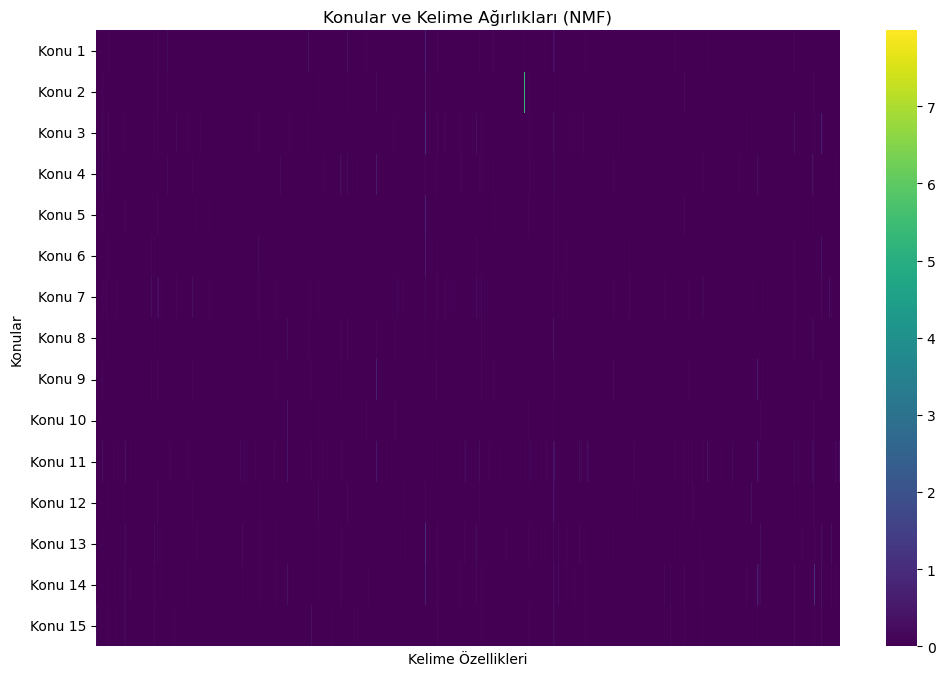

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# En önemli kelimeleri listeleme
def print_top_words(H, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(H):
        print(f"Konu #{topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(H, tfidf_vectorizer.get_feature_names_out())

# Her konunun kelimelerle olan ilişkisinin görselleştirilmesi
plt.figure(figsize=(12, 8))
sns.heatmap(H, cmap='viridis', yticklabels=[f'Konu {i+1}' for i in range(H.shape[0])], xticklabels=False)
plt.xlabel("Kelime Özellikleri")
plt.ylabel("Konular")
plt.title("Konular ve Kelime Ağırlıkları (NMF)")
plt.show()

konu 1, konu 2 ... diye giden kısımlarda her bir konu için en önemli kelimeler verilmiş. Bİr kaç konuyu incelediğim zaman alltaki sonuçlara varıyorum.

Konu 1; the, in, from, scene, on, at, to gibi kelimeler, bu konunun sahne, mekan, ve durum betimlemeleriyle ilgili olabileceğini gösteriyor.

Konu 6; her, she, in, woman, girl, shes, who, and, with, is gibi kelimeler, bu konunun kadın karakterler ve onların hikayeleriyle ilgili olduğunu düşündürüyor.

Konu 12; tv, series, episode, the, this, season, to, on, my, funny gibi kelimeler, bu konunun televizyon dizileri ve bölümleri ile ilgili olabileceğini gösteriyor.

In [38]:
# yukarıdaki grafikte de kelime ağırlıklarının bir ısı haritasını görüyoruz.

Açık Renkler: Yüksek ağırlık anlamına gelir, yani o kelime bu konu için oldukça belirleyicidir.
Koyu Renkler: Düşük ağırlık anlamına gelir, yani o kelime bu konu için çok belirleyici değildir.

Görselde birçok konunun ortak ve anlamı az olan kelimeleri içerdiği görülüyor (the, in, at gibi). Bu kelimelerin modelde kalması konuların anlamlı bir şekilde ayrılmasını zorlaştırabilir. Bu tür stop words kelimeleri daha etkili bir şekilde kaldırmak modelin performansını artırabilir

veride çok sık geçen ama anlamı az olan kelimeleri de kendi özel stop word listemize ekleyeceğiz.

In [44]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# NLTK İngilizce stop words listesini alıyoruz
stop_words = set(stopwords.words('english'))

# Özel olarak eklemek istediğimiz bazı genel kelimeler (görselden çıkarımlar)
extra_stop_words = {
    'movie', 'film', 'one', 'would', 'could', 'also', 'really', 'even', 'much', 'many', 'get', 'may',
    'the', 'in', 'at', 'of', 'is', 'to', 'and', 'with', 'for', 'that', 'on', 'it', 'by', 'this', 'an', 'as'
}

# Özel stop words listesine ekleme
stop_words.update(extra_stop_words)

# Stop words set'ini listeye çevirme
stop_words = list(stop_words)

[nltk_data] Downloading package stopwords to C:\Users\Alper
[nltk_data]     Ilgın\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


metinleri sayısallaştırırken, özel olarak oluşturduğunuz stop words listesini kullanıyorum.

Bu sayede, hem NLTK'nin yaygın stop words listesi hem de eklediğimiz özel kelimeler TF-IDF vektörleştirici tarafından çıkarılacak.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Dönüştürücü (Vectorizer) kullanarak metin verisini sayısal hale getirme
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=stop_words)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_review'])

Stop words'leri daha etkili bir şekilde temizledikten sonra, NMF modelini yeniden eğiterek konuların nasıl ayrıldığını gözlemleyeceğim.

şimdi NFM modelini tekrar eğitim görselleştirme yapacağım. 5 konu üzerinden ilerleyeceğim.

In [82]:
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns

# Stop words çıkarıldıktan sonra NMF modelini yeniden eğitiyorum (5 konu seçiyorum bu sefer.)
nmf_model = NMF(n_components=5, random_state=42, max_iter=500)
W = nmf_model.fit_transform(X_tfidf)
H = nmf_model.components_

feature_names = tfidf_vectorizer.get_feature_names_out() #burada en önemli kelimeleri listeliyorum.

def print_top_words(H, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(H):
        print(f"Konu #{topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(H, feature_names)

Konu #1:
ha, scene, woman, doe, performance, play, work, young, role, take
Konu #2:
wa, thought, didnt, saw, made, wasnt, seemed, part, year, watched
Konu #3:
bad, dont, acting, worst, seen, plot, horror, thing, guy, funny
Konu #4:
episode, series, season, tv, funny, original, dvd, new, fan, television
Konu #5:
book, read, novel, version, adaptation, based, reading, better, original, jane


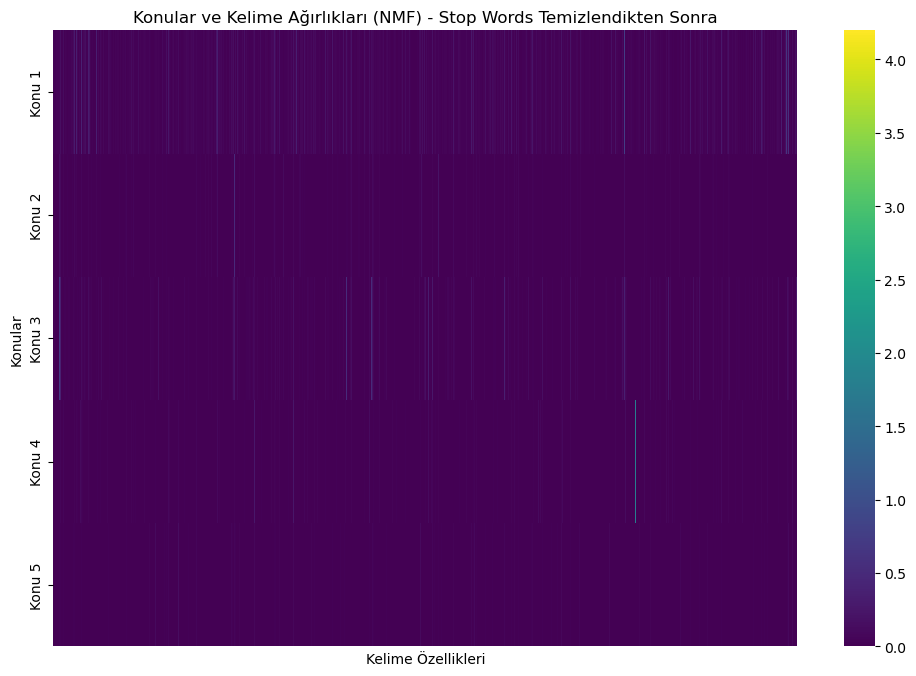

In [83]:
# Konuların kelimelerle ilişkisini görselleştirme (Heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(H, cmap='viridis', yticklabels=[f'Konu {i+1}' for i in range(H.shape[0])], xticklabels=False)
plt.xlabel("Kelime Özellikleri")
plt.ylabel("Konular")
plt.title("Konular ve Kelime Ağırlıkları (NMF) - Stop Words Temizlendikten Sonra")
plt.show()

yukarıdaki konulara baktığımda ayrışma daha düzenli hale gelmiş gibi görünüyor.

Konu 1 ; ha, life, character, man, woman, scene, two, way, story, people — Bu kelimeler, genel olarak bir film hikayesinin karakterleri ve yaşamıyla ilgili bir konuyu ifade ediyor gibi duruyor.

Konu 5; great, good, story, best, actor, love, performance, well, role, character — Bu kelimeler, oyunculuk performansı ve hikaye kalitesi ile ilgili bir konuyu gösteriyor.

In [50]:
# daha iyi sonuç alabileceğimi ümit ederek konu sayısını 10 yapıyorum. BÖylece karşılaştırmada yapmış olacağım.


10 Konu için en önemli kelimeler:

Konu #1:
scene, ha, man, two, war, director, time, work, take, doe
Konu #2:
wa, thought, didnt, saw, made, wasnt, first, seemed, time, part
Konu #3:
bad, acting, good, plot, terrible, script, guy, awful, actor, effect
Konu #4:
show, episode, series, season, tv, television, funny, new, first, character
Konu #5:
great, good, actor, best, performance, role, well, comedy, cast, excellent
Konu #6:
like, dont, people, think, know, watch, see, thing, say, im
Konu #7:
seen, ever, ive, worst, time, best, never, made, watch, see
Konu #8:
character, story, book, main, read, plot, interesting, novel, well, original
Konu #9:
horror, zombie, gore, effect, fan, flick, scary, budget, house, blood
Konu #10:
love, life, family, child, girl, young, woman, father, story, mother


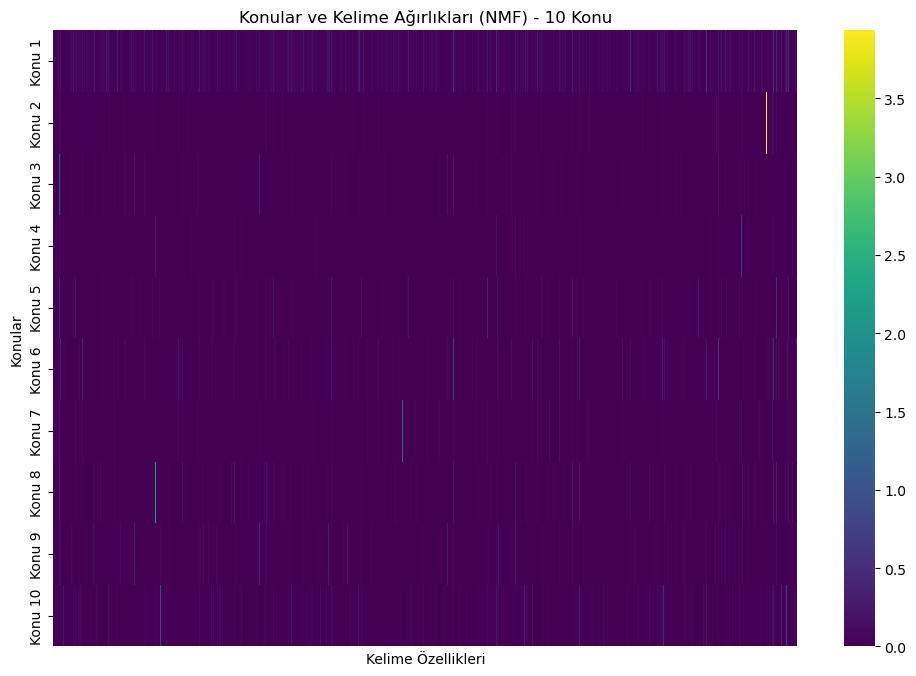

In [49]:
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import seaborn as sns

# NMF Modelini 10 konu için oluşturma ve eğitme
nmf_model_10 = NMF(n_components=10, random_state=42, max_iter=500)
W_10 = nmf_model_10.fit_transform(X_tfidf)
H_10 = nmf_model_10.components_

# En önemli kelimeleri listeleme
print("\n10 Konu için en önemli kelimeler:\n")
print_top_words(H_10, feature_names)

# Konuların Kelimelerle İlişkisini Görselleştirme (Heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(H_10, cmap='viridis', yticklabels=[f'Konu {i+1}' for i in range(H_10.shape[0])], xticklabels=False)
plt.xlabel("Kelime Özellikleri")
plt.ylabel("Konular")
plt.title("Konular ve Kelime Ağırlıkları (NMF) - 10 Konu")
plt.show()

Konu 9; horror, zombie, gore, effect, fan, flick, scary, budget, house, blood kelimeleri korku türü ile ilgili bir konuyu net bir şekilde ifade ediyor.

Yine aynı şekilde Konu 10 da, love, life, family, child, girl, young, woman, father, story, mother kelimeleri aile ve ilişkilere odaklanmış şekilde

Konu sayısı arttığı için daha fazla spesifik tema ortaya çıkmış ve konular arasında daha net bir ayrışma sağlanmış. Her konuyu ifade eden kelimeler, belirli bir tema etrafında toplanmış durumda.

Her konunun belirgin kelimelerini seçmek için vektörleştiricide max_features parametresini daha düşük bir sayıya çekeceğim.

Stop words listesini daha kapsamlı bir hale getirip, anlamı düşük olan kelimeleri daha detaylı şekilde temizleyeceğim.

Sadece en önemli 20 kelimeyi seçerek bir görsel oluşturarak devam edeceğim.

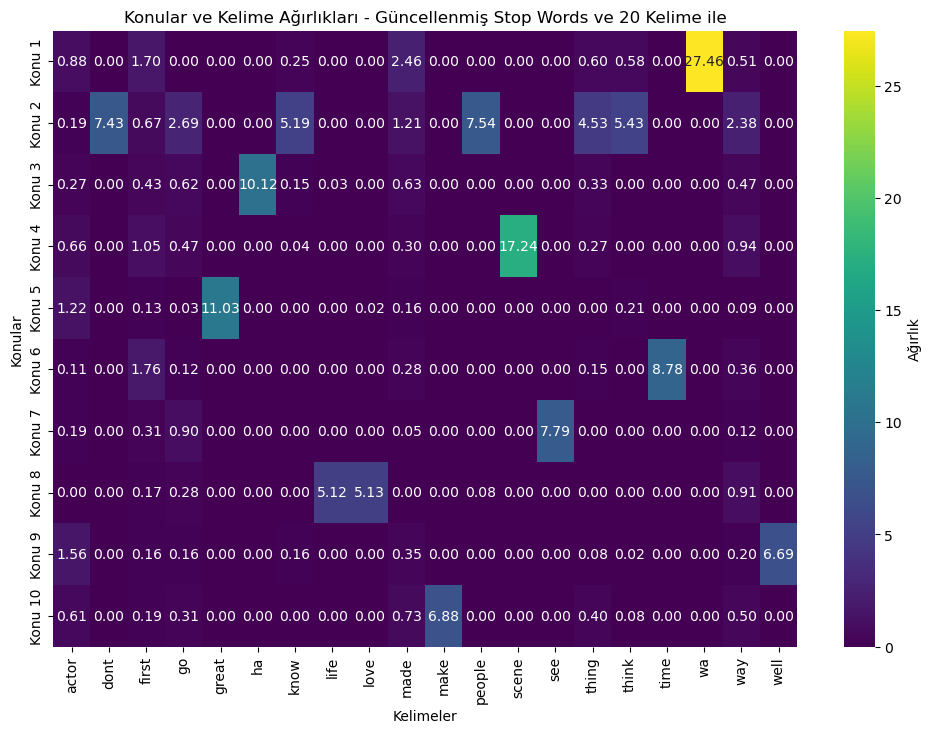

In [109]:
# En fazla 20 özellik seçerek vektörleştiriciyi yeniden oluşturuyorum.
tfidf_vectorizer = TfidfVectorizer(max_features=20, stop_words=list(stop_words))
X_tfidf = tfidf_vectorizer.fit_transform(X)

# NMF modeli ile konuları çıkartıyorum.
nmf_model = NMF(n_components=10, random_state=42, max_iter=500)
W = nmf_model.fit_transform(X_tfidf)
H = nmf_model.components_

# En önemli 10 kelime üzerinden görselleştirme yapıyorum.
feature_names = tfidf_vectorizer.get_feature_names_out()

plt.figure(figsize=(12, 8))
sns.heatmap(H, cmap='viridis', yticklabels=[f"Konu {i+1}" for i in range(H.shape[0])],
            xticklabels=feature_names, annot=True, fmt=".2f", cbar_kws={'label': 'Ağırlık'})
plt.title("Konular ve Kelime Ağırlıkları - Güncellenmiş Stop Words ve 20 Kelime ile")
plt.xlabel("Kelimeler")
plt.ylabel("Konular")
plt.show()

In [110]:
import numpy as np

# Her konu için en önemli kelimeleri bulmak için
n_top_words = 10  # Her konu için göstermek istediğiniz en önemli kelime sayısı
feature_names = tfidf_vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(H):  # H, NMF veya LDA modelinden elde edilen bileşenler matrisi
    top_words_indices = topic.argsort()[-n_top_words:][::-1]  # En yüksek ağırlıklı kelimeleri sıralar
    top_words = [feature_names[i] for i in top_words_indices]  # En yüksek ağırlıklı kelimeleri alır
    print(f"Konu {topic_idx + 1}: {', '.join(top_words)}")

Konu 1: wa, made, first, actor, thing, think, way, know, see, scene
Konu 2: people, dont, think, know, thing, go, way, made, first, actor
Konu 3: ha, made, go, way, first, thing, actor, know, life, scene
Konu 4: scene, first, way, actor, go, made, thing, know, see, people
Konu 5: great, actor, think, made, first, way, go, love, time, thing
Konu 6: time, first, way, made, thing, go, actor, know, scene, people
Konu 7: see, go, first, actor, way, made, thing, scene, people, make
Konu 8: love, life, way, go, first, people, well, dont, great, ha
Konu 9: well, actor, made, way, know, first, go, thing, think, dont
Konu 10: make, made, actor, way, thing, go, first, think, time, know


konu 1 içinde ısı haritasında wa kelimesi yüksek ağırlığa sahip. bu kelimenin önemi bu konu için çok yüksek demek.
Isı haritasını incelediğimde konu 1 için "wa", "made", "first", "actor", "thing" gibi kelimeler öne çıkıyor. konu 1 film yada sahne teması olduğunu anlıyoruz.

konular arasındaki farklılıkları görmek için en çok ağırlığa sahip kelimelere bakabiliriz

Konu 5: "great", "actor", "think" gibi kelimelerle, oyuncu performansı ya da değerlendirme ile ilgili olabilir.

Konu 10: "make", "actor", "way", "thing" gibi kelimelerle, yaratıcı süreç veya aktörlerin rolü hakkında olabilir.

bu görselleştirme, her bir konunun hangi anahtar kelimelerle öne çıktığını görselleştirerek, modelin hangi kelimeleri hangi konular için en anlamlı bulduğunu gösteriyor. İçerik temelli konuların keşfedilmesine ve derinlemesine bir yorum yapılacağındaa bu tür bir analiz yapabiliriz.

bunun yanında LDA modeliyle de bir inceleme yapıyorum.

Konu #1:
great, wa, see, well, ha, time, make, way, made, go
Konu #2:
actor, wa, well, ha, time, make, great, see, made, scene
Konu #3:
know, dont, wa, see, time, ha, make, thing, well, go
Konu #4:
wa, made, thing, time, make, ha, see, well, way, dont
Konu #5:
think, wa, dont, make, time, see, ha, thing, people, well
Konu #6:
love, life, wa, ha, time, make, see, well, way, scene
Konu #7:
ha, go, way, make, wa, time, see, well, thing, scene
Konu #8:
scene, wa, ha, time, see, make, well, way, made, first
Konu #9:
first, wa, time, ha, see, make, well, way, thing, made
Konu #10:
people, wa, see, make, ha, time, life, dont, thing, know


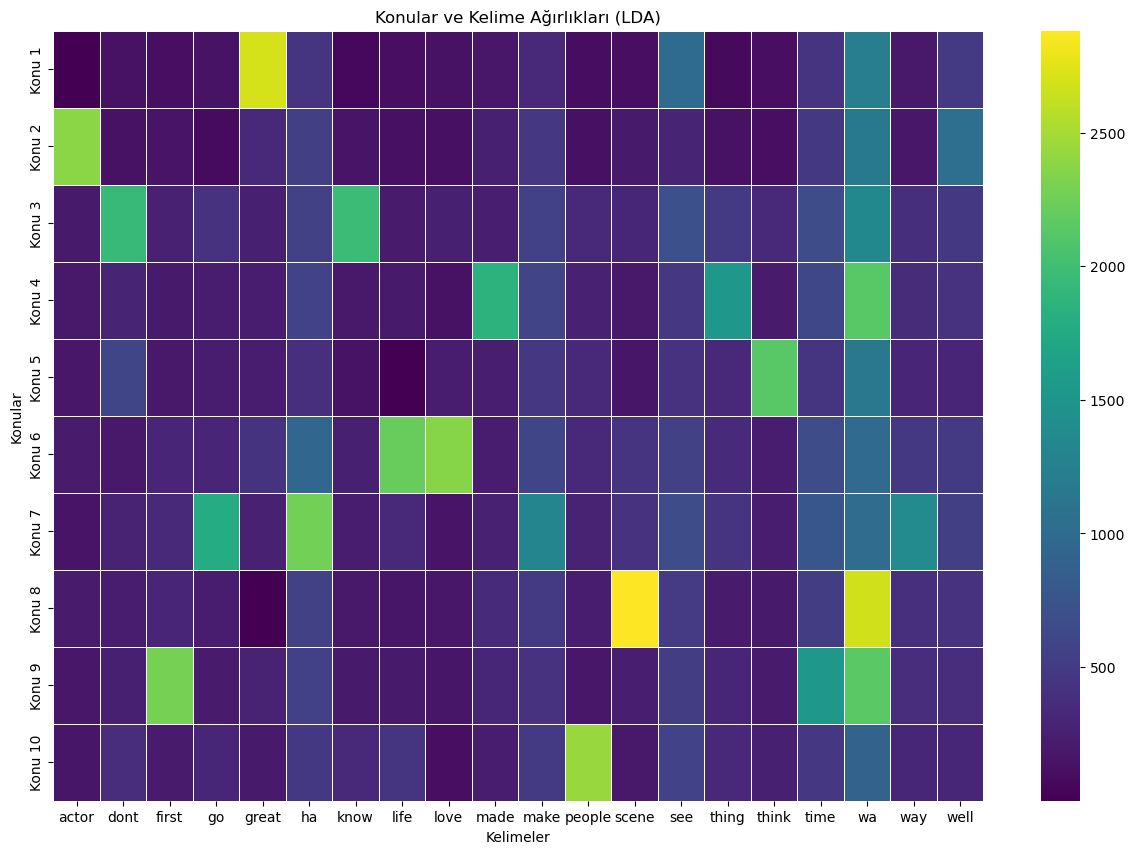

In [111]:
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. LDA Modelini Oluşturma
n_topics = 10  # Konu sayısını belirleyebilirsiniz, ihtiyaca göre artırılabilir.
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=10, learning_method='online')

# 2. LDA Modeli ile Fit Etme
lda_model.fit(X_tfidf)

# 3. Konular ve Kelimeler Arasındaki Ağırlık Matrisi
lda_components = lda_model.components_

# 4. Kelimeleri Listeleme
feature_names = tfidf_vectorizer.get_feature_names_out()

# Her konuyu temsil eden en önemli kelimeleri ve ağırlıklarını yazdırma
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Konu #{topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda_model, feature_names)

# 5. LDA'nın Konu ve Kelime İlişkisini Görselleştirme (Isı Haritası)
lda_df = pd.DataFrame(lda_components, index=[f'Konu {i+1}' for i in range(n_topics)], columns=feature_names)

plt.figure(figsize=(15, 10))
sns.heatmap(lda_df, cmap='viridis', cbar=True, annot=False, linewidths=0.5)
plt.title("Konular ve Kelime Ağırlıkları (LDA)")
plt.xlabel("Kelimeler")
plt.ylabel("Konular")
plt.show()

Konu 2: "actor", "wa", "see", "make", "scene" gibi kelimelerle tanımlanmış. Bu kelimeler, oyunculuk veya sahne ile ilgili bir tema

Konu 7: "ha", "go", "way", "make", "scene", "thing" gibi kelimelerle tanımlanmış. Bu konu, bir hikaye akışı veya olay örgüsü gibi daha genel bir temayı işaret edebilir

"ha" kelimesi birçok konuda görülüyor, bu da genel bir kelime olarak sıkça kullanıldığını gösteriyor. Ancak "actor" veya "scene" gibi kelimeler belirli konularda daha yüksek ağırlıklarla görülmekte.

Konu 5 ile Konu 7 arasında bazı benzer anahtar kelimeler bulunmakta. Bu durum, temaların bazı ortak kelimeler üzerine inşa edildiğini ve konuların kesin olarak ayrılmadığını gösterebilir.

LDA modeli, konular arasındaki ilişkileri ve temaları iyi bir şekilde gösterse de bazı anahtar kelimelerin birçok konuyla ilişkilendirilmesi, temaların tam anlamıyla ayrışmadığı izlenimi veriyor.

NMF modeline kıyasla daha geniş bir kelime dağılımı olduğu için bazı temaların net bir şekilde ayrıştırılamadığı görülmektedir.

bu iki model arasında konuları belirli temalara göre ayırt etmek amacıyla NMF modelini seçmek daha uygun olacaktır.

In [58]:
#şimdi doğru modeli seçip görselleştirme işlemi yapacağız.
#daha önce oluşturduğumuz sınıflandırma modellerini kullanacağız.
#Daha sonra confusion matrix kullanarak bu modelin sınıflandırma performansını daha detaylı bir şekilde analiz edeceğiz

modelleri allta tekrar oluşturuğ eğitiyorum.

In [52]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes modelini oluşturma
model_nb = MultinomialNB()

# Modeli eğitim verisi üzerinde eğitme (TF-IDF kullanarak)
model_nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [54]:
from sklearn.linear_model import LogisticRegression

# Lojistik Regresyon modelini oluşturma
model_logreg = LogisticRegression(max_iter=1000)

# Modeli eğitim verisi üzerinde eğitme (TF-IDF kullanarak)
model_logreg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [56]:
from sklearn.svm import SVC

# SVM modelini oluşturma
model_svm = SVC(kernel='rbf', C=10, random_state=42)

# Modeli eğitim verisi üzerinde eğitme (TF-IDF kullanarak)
model_svm.fit(X_train_tfidf, y_train)

SVC(C=10, random_state=42)

altta yazacağım kod yukarıda oluşturduğun 3 modelin performansını karşılaştıracak böylece en iyi modeli seçeceğim.


Model: Naive Bayes
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85

Model: Logistic Regression
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89

Model: SVM
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89

En iyi model: SVM


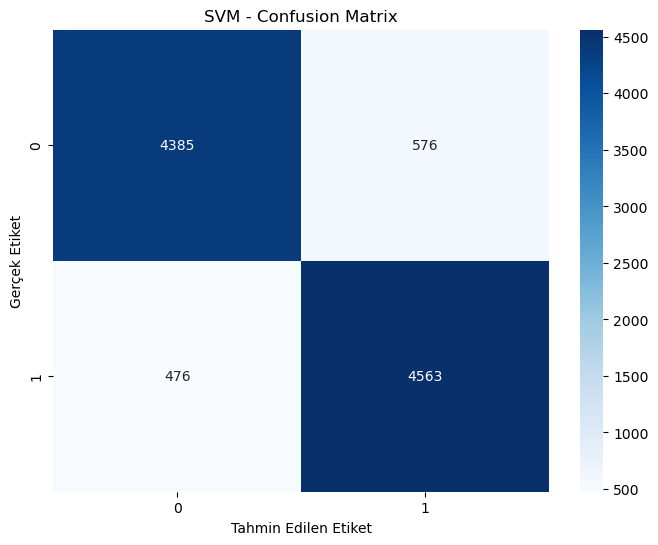

In [57]:
# Eğitim ve test veri setleri (önceden tanımlandı)
# X_train, X_test, y_train, y_test

# Naive Bayes modelini oluşturma ve eğitme
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)

# Lojistik Regresyon modelini oluşturma ve eğitme
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train_tfidf, y_train)

# SVM modelini oluşturma ve eğitme
from sklearn.svm import SVC
model_svm = SVC(kernel='rbf', C=10, random_state=42)
model_svm.fit(X_train_tfidf, y_train)

# Test veri seti üzerinde modellerin tahminlerini alıyoruz
y_pred_nb = model_nb.predict(X_test_tfidf)
y_pred_logreg = model_logreg.predict(X_test_tfidf)
y_pred_svm = model_svm.predict(X_test_tfidf)

# Performans metriklerini hesaplama
metrics = {
    "Naive Bayes": {
        "Accuracy": accuracy_score(y_test, y_pred_nb),
        "Precision": precision_score(y_test, y_pred_nb, average='weighted'),
        "Recall": recall_score(y_test, y_pred_nb, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred_nb, average='weighted')
    },
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_logreg),
        "Precision": precision_score(y_test, y_pred_logreg, average='weighted'),
        "Recall": recall_score(y_test, y_pred_logreg, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred_logreg, average='weighted')
    },
    "SVM": {
        "Accuracy": accuracy_score(y_test, y_pred_svm),
        "Precision": precision_score(y_test, y_pred_svm, average='weighted'),
        "Recall": recall_score(y_test, y_pred_svm, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred_svm, average='weighted')
    }
}

# Performans sonuçlarını yazdırma
for model_name, scores in metrics.items():
    print(f"\nModel: {model_name}")
    for metric, value in scores.items():
        print(f"{metric}: {value:.2f}")

# En iyi modelin belirlenmesi ve confusion matrix görselleştirilmesi
best_model_name = max(metrics, key=lambda x: metrics[x]["F1 Score"])
print(f"\nEn iyi model: {best_model_name}")

# Confusion Matrix görselleştirme
if best_model_name == "Naive Bayes":
    best_model = model_nb
    y_pred_best = y_pred_nb
elif best_model_name == "Logistic Regression":
    best_model = model_logreg
    y_pred_best = y_pred_logreg
else:
    best_model = model_svm
    y_pred_best = y_pred_svm

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title(f'{best_model_name} - Confusion Matrix')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()

modellere göre çıkan sonuç ve tabloya göre SVM ve lojistik regresyon modelleri arasında tüm metriklerde aynı sonuç çıkmış.

Bu durumda herhangi birini seçmek uygun olabilirdi ancak SVM daha karmaşık karar sınırları oluşturarak, özellikle daha zor sınıflandırma problemlerinde performansı daha iyi olabilecek bir modeldir.
Bu yüzden SVM modelini en iyi model olarak seçtik.

Tabloya baktığımızda ise model 4385 adet örneği negatif(0) olarak doğru sınıflandırmış. Model, 576 negatif örneği yanlış bir şekilde pozitif olarak sınıflandırmış

yine aynı şekilde 4563 örnepi pozitif(1) olarak duğru şekilde sınıflandırmış. Model, 476 pozitif örneği yanlış bir şekilde negatif olarak sınıflandırmış

Hem negatif (0) hem de pozitif (1) sınıflar için doğru sınıflandırma oranı oldukça yüksek. Bu, modelin her iki sınıfta da başarılı olduğunu gösteriyor.

Yanlış pozitif ve yanlış negatiflerin sayıları birbirine yakın. Bu durum, modelin hata yapma eğiliminde belirgin bir dengesizlik olmadığını ve her iki sınıfı da iyi öğrendiğini gösteriyor

Accuracy, Precision, Recall ve F1 Score değerleri, modelin genel olarak iyi bir performansa sahip olduğunu ve hem pozitif hem de negatif sınıfları dengeli bir şekilde sınıflandırabildiğini gösteriyor.